# Reading Dataset
The dataset used here is from a gas refinery. The language used for safeguard description in a HAZOP meeting is highly standardized. Therefore, I can apply the ML algorithm on other projects.
The client is also building several identical gas refineries. Therefore, this data analysis and Machine Learning Algorithms are applicable for their future projects.

In [1]:
import pandas as pd
import numpy as np
import nltk
#nltk.download('all') #import and download the NLTK library *only once

In [2]:
df = pd.read_csv ("P Pretreatment PHA Safeguard Export.csv")
df

,Safeguard,Tag,Category,Location Used,Is SIF,Comments
0,1:106-300-LIT-060005-A/B/C close 106-300-UV-06...,106-300-LIT-060005-A/B/C,Instrumented Protection Function,1.1.9.1.1 \r\n1.1.9.3.1,True,NaN
1,2:106-300-LIT-060006-A/B/C close 106-300-UV-06...,106-300-LIT-060006-A/B/C,Instrumented Protection Function,1.1.9.2.1 \r\n1.1.9.4.1,True,NaN
2,3:106-300-LIT-060005 A/B/C closes 106-300-UV-0...,106-300-LIT-060005 A/B/C,Instrumented Protection Function,1.1.8.1.1,NaN,NaN
3,4:106-300-LIT-060005-A/B/C high level alarm wi...,106-300-LIT-060005-A/B/C,Alarm and Operator Intervention,1.1.8.1.2 \r\n1.1.8.1.3 \r\n1.1.8.1.4,NaN,NaN
4,5:106-300-LIT-060006-A/B/C closes UV 010001 on...,106-300-LIT-060006 A/B/C,Instrumented Protection Function,1.1.8.2.1,NaN,NaN
...,...,...,...,...,...,...
507,508:100% sized spare Hot Oil Filter 120-700-F-...,120-700-F-20001-A/B,Redundant Backup Equipment / System,NaN,NaN,Hot oil filter is not 100% spare for max CO2 c...
508,509:High differential pressure alarm at 120-70...,120-7000-PDAH-200016,Alarm and Operator Intervention,NaN,NaN,NaN
509,510:High differential pressure alarm at 120-70...,120-700-PDAH-200002,Alarm and Operator Intervention,1.53.1.2.1,NaN,NaN
510,511:Low Temperature alarm from Hot Oil Furnace...,120-700-TT-200101,Alarm and Operator Intervention,1.55.1.1.1 \r\n1.55.1.3.1,NaN,"Note, there are interlocks in the Hot Oil Furn..."


# Data cleaning
* Step 1: Transforming information in the "Safeguard" column to "description" column
          a. Remove the number and colon in the Safeguard column
          b. Clean the data by lowercasing, removing basic stop words (i.e. “a”, “the”, “is”, etc), and lemmatizing   
* Step 2: Remove all blanks and outlier categories in "Category" column
          We are only interested in interlocks, Alarms, equipment and check valves. 
* Step 3: Ordinal encoding the Categories
          Interlocks can be either in the Safety Systems (Instrumented Protection function, which is also known as SIF) or Basic Process Control System (BPCS). The description of the interlocks are very similar. The difference is only in which system, safety system or BPCS, the interlocks are installed. Therefore, the algorithm will categorize them into a more encompassing category "Interlocks".  
          
          

In [3]:
#Step 1:

from nltk.corpus import stopwords #stop words
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer #lemmatizing

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

description = []

for i, row in df.iterrows():
    temp = row['Safeguard'].split(':')[1:] #extract all the strings after the first colon
    word_tokens = word_tokenize(" ".join(temp)) #break the sentence into tokens
    filtered_sentence = []
    for w in word_tokens: #within each string in a data cell
        if w not in stop_words:
            w = lemmatizer.lemmatize(w) #lemmatizing
            w = w.lower() #lowercasing
            filtered_sentence.append(w)
    description.append(" ".join(filtered_sentence)) #concatenation of all the string
df['description'] = description
    

#checking dataframe
df

,Safeguard,Tag,Category,Location Used,Is SIF,Comments,description
0,1:106-300-LIT-060005-A/B/C close 106-300-UV-06...,106-300-LIT-060005-A/B/C,Instrumented Protection Function,1.1.9.1.1 \r\n1.1.9.3.1,True,NaN,106-300-lit-060005-a/b/c close 106-300-uv-0600...
1,2:106-300-LIT-060006-A/B/C close 106-300-UV-06...,106-300-LIT-060006-A/B/C,Instrumented Protection Function,1.1.9.2.1 \r\n1.1.9.4.1,True,NaN,106-300-lit-060006-a/b/c close 106-300-uv-0600...
2,3:106-300-LIT-060005 A/B/C closes 106-300-UV-0...,106-300-LIT-060005 A/B/C,Instrumented Protection Function,1.1.8.1.1,NaN,NaN,106-300-lit-060005 a/b/c close 106-300-uv-0100...
3,4:106-300-LIT-060005-A/B/C high level alarm wi...,106-300-LIT-060005-A/B/C,Alarm and Operator Intervention,1.1.8.1.2 \r\n1.1.8.1.3 \r\n1.1.8.1.4,NaN,NaN,106-300-lit-060005-a/b/c high level alarm oper...
4,5:106-300-LIT-060006-A/B/C closes UV 010001 on...,106-300-LIT-060006 A/B/C,Instrumented Protection Function,1.1.8.2.1,NaN,NaN,106-300-lit-060006-a/b/c close uv 010001 high ...
...,...,...,...,...,...,...,...
507,508:100% sized spare Hot Oil Filter 120-700-F-...,120-700-F-20001-A/B,Redundant Backup Equipment / System,NaN,NaN,Hot oil filter is not 100% spare for max CO2 c...,100 % sized spare hot oil filter 120-700-f-200...
508,509:High differential pressure alarm at 120-70...,120-7000-PDAH-200016,Alarm and Operator Intervention,NaN,NaN,NaN,high differential pressure alarm 120-7000-pdt-...
509,510:High differential pressure alarm at 120-70...,120-700-PDAH-200002,Alarm and Operator Intervention,1.53.1.2.1,NaN,NaN,high differential pressure alarm 120-700-pdi-2...
510,511:Low Temperature alarm from Hot Oil Furnace...,120-700-TT-200101,Alarm and Operator Intervention,1.55.1.1.1 \r\n1.55.1.3.1,NaN,"Note, there are interlocks in the Hot Oil Furn...",low temperature alarm hot oil furnace discharg...


In [4]:
#Step 2:
df = df.dropna(subset=['Category']) # NOTE TO SELF df.dropna() by default returns a new dataset without NaN values. So, you have to assign it to the variable.
list = ['Instrumented Protection Function', 'Alarm and Operator Intervention', 'Redundant Backup Equipment / System', 'Basic Process Control System', 'Check Valve'] 
df = df[df['Category'].isin(list)]
#checking dataframe
df

,Safeguard,Tag,Category,Location Used,Is SIF,Comments,description
0,1:106-300-LIT-060005-A/B/C close 106-300-UV-06...,106-300-LIT-060005-A/B/C,Instrumented Protection Function,1.1.9.1.1 \r\n1.1.9.3.1,True,NaN,106-300-lit-060005-a/b/c close 106-300-uv-0600...
1,2:106-300-LIT-060006-A/B/C close 106-300-UV-06...,106-300-LIT-060006-A/B/C,Instrumented Protection Function,1.1.9.2.1 \r\n1.1.9.4.1,True,NaN,106-300-lit-060006-a/b/c close 106-300-uv-0600...
2,3:106-300-LIT-060005 A/B/C closes 106-300-UV-0...,106-300-LIT-060005 A/B/C,Instrumented Protection Function,1.1.8.1.1,NaN,NaN,106-300-lit-060005 a/b/c close 106-300-uv-0100...
3,4:106-300-LIT-060005-A/B/C high level alarm wi...,106-300-LIT-060005-A/B/C,Alarm and Operator Intervention,1.1.8.1.2 \r\n1.1.8.1.3 \r\n1.1.8.1.4,NaN,NaN,106-300-lit-060005-a/b/c high level alarm oper...
4,5:106-300-LIT-060006-A/B/C closes UV 010001 on...,106-300-LIT-060006 A/B/C,Instrumented Protection Function,1.1.8.2.1,NaN,NaN,106-300-lit-060006-a/b/c close uv 010001 high ...
...,...,...,...,...,...,...,...
506,507:Minimum Hot oil recycle flow through 120-7...,120-700-FV-200003,Basic Process Control System,NaN,NaN,NaN,minimum hot oil recycle flow 120-700-fv-200003
507,508:100% sized spare Hot Oil Filter 120-700-F-...,120-700-F-20001-A/B,Redundant Backup Equipment / System,NaN,NaN,Hot oil filter is not 100% spare for max CO2 c...,100 % sized spare hot oil filter 120-700-f-200...
508,509:High differential pressure alarm at 120-70...,120-7000-PDAH-200016,Alarm and Operator Intervention,NaN,NaN,NaN,high differential pressure alarm 120-7000-pdt-...
509,510:High differential pressure alarm at 120-70...,120-700-PDAH-200002,Alarm and Operator Intervention,1.53.1.2.1,NaN,NaN,high differential pressure alarm 120-700-pdi-2...


In [5]:
#Step 3:
#Changing SIFs and BPCS functions to 'Interlocks'
df['Category'] = df['Category'].replace(['Instrumented Protection Function', 'Basic Process Control System'], 'Interlocks') 
#Encoding Category column and create a new column Ordinal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_fitted = le.fit_transform(df['Category'])
df['Ordinal'] = le_fitted
#checking dataframe
df

,Safeguard,Tag,Category,Location Used,Is SIF,Comments,description,Ordinal
0,1:106-300-LIT-060005-A/B/C close 106-300-UV-06...,106-300-LIT-060005-A/B/C,Interlocks,1.1.9.1.1 \r\n1.1.9.3.1,True,NaN,106-300-lit-060005-a/b/c close 106-300-uv-0600...,2
1,2:106-300-LIT-060006-A/B/C close 106-300-UV-06...,106-300-LIT-060006-A/B/C,Interlocks,1.1.9.2.1 \r\n1.1.9.4.1,True,NaN,106-300-lit-060006-a/b/c close 106-300-uv-0600...,2
2,3:106-300-LIT-060005 A/B/C closes 106-300-UV-0...,106-300-LIT-060005 A/B/C,Interlocks,1.1.8.1.1,NaN,NaN,106-300-lit-060005 a/b/c close 106-300-uv-0100...,2
3,4:106-300-LIT-060005-A/B/C high level alarm wi...,106-300-LIT-060005-A/B/C,Alarm and Operator Intervention,1.1.8.1.2 \r\n1.1.8.1.3 \r\n1.1.8.1.4,NaN,NaN,106-300-lit-060005-a/b/c high level alarm oper...,0
4,5:106-300-LIT-060006-A/B/C closes UV 010001 on...,106-300-LIT-060006 A/B/C,Interlocks,1.1.8.2.1,NaN,NaN,106-300-lit-060006-a/b/c close uv 010001 high ...,2
...,...,...,...,...,...,...,...,...
506,507:Minimum Hot oil recycle flow through 120-7...,120-700-FV-200003,Interlocks,NaN,NaN,NaN,minimum hot oil recycle flow 120-700-fv-200003,2
507,508:100% sized spare Hot Oil Filter 120-700-F-...,120-700-F-20001-A/B,Redundant Backup Equipment / System,NaN,NaN,Hot oil filter is not 100% spare for max CO2 c...,100 % sized spare hot oil filter 120-700-f-200...,3
508,509:High differential pressure alarm at 120-70...,120-7000-PDAH-200016,Alarm and Operator Intervention,NaN,NaN,NaN,high differential pressure alarm 120-7000-pdt-...,0
509,510:High differential pressure alarm at 120-70...,120-700-PDAH-200002,Alarm and Operator Intervention,1.53.1.2.1,NaN,NaN,high differential pressure alarm 120-700-pdi-2...,0


# Splitting the dataframe into training and test data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.description, df.Ordinal, random_state = 80)

# Multinomial Naive Bayes Algorithm
    This part of the code uses the pipeline API from the SKlearn Package

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

SafeguardCat = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [8]:
SafeguardCat.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [9]:
SafeguardCat.score(X_test,y_test)

0.9560439560439561

# Testing with new data

In [10]:
test = ['high pressure across vessel', 'TSLL trips pump']
result = SafeguardCat.predict(test)
print(le.inverse_transform(result)) #convert codes back to label

['Alarm and Operator Intervention' 'Interlocks']


The result is very accurate based on real HAZOP records. 

# Creating Word Clouds for Alarms and Interlocks
Visualizing the word frequency to the two Safeguard categories


Description words for Alarm Category :


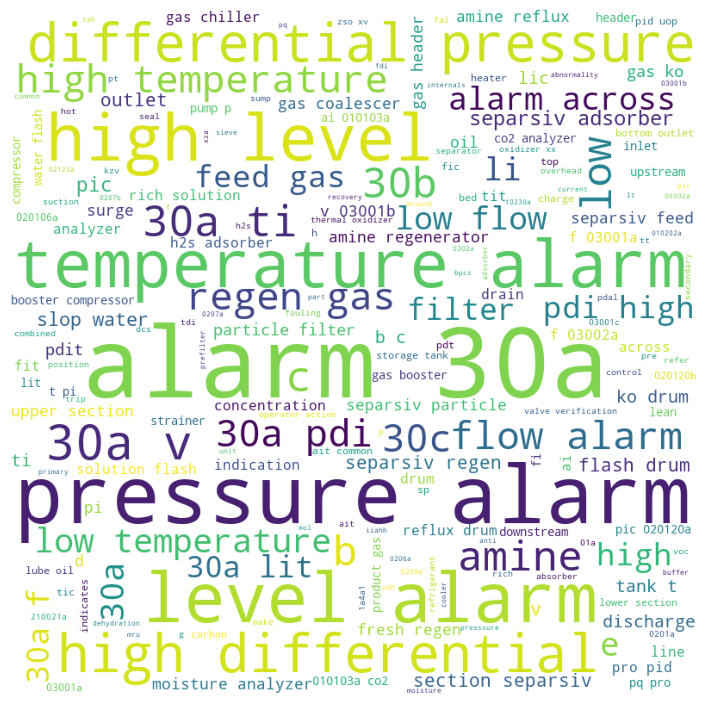

Description words for Interlocks Category :


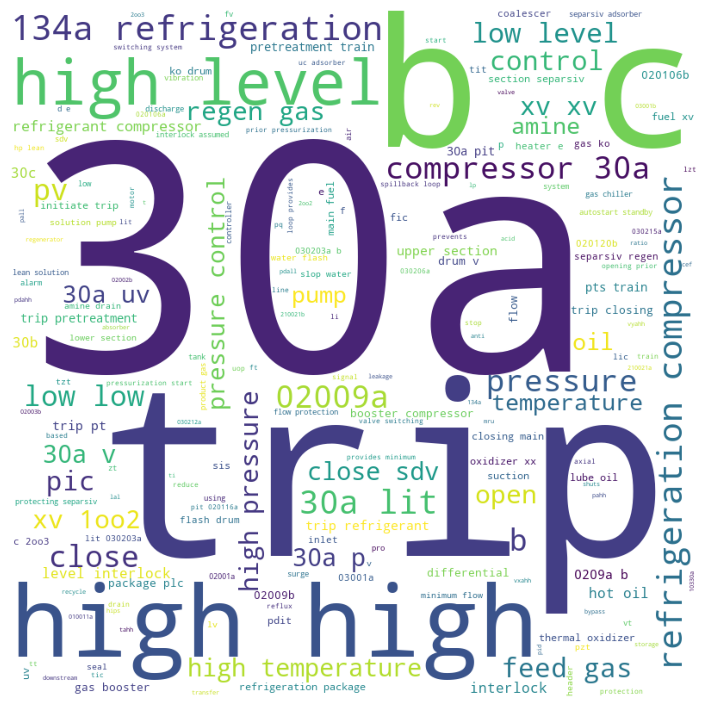

In [11]:
#building a corpus by combining all the words fitting the category into one big string
alarmdf = df[df['Category'] == 'Alarm and Operator Intervention']
alarmcorpus = " ".join(alarmdf['description'].values.tolist()) 
interdf = df[df['Category'] == 'Interlocks']
intercorpus = " ".join(interdf['description'].values.tolist()) 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def my_wordcloud(corpus):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 2).generate(corpus)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 4)
 
    plt.show()

print('Description words for Alarm Category :')    
my_wordcloud(alarmcorpus)
print('Description words for Interlocks Category :')    
my_wordcloud(intercorpus)